# Содержание

1. [Загрузка данных и подготовка их к анализу](#start)   
    1.1. [Выводы](#start_result)
2. [Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии](#def)   
    2.1. [Функция для получения пользовательских профилей](#def_profile)   
    2.2. [Функция для расчёта LTV и ROI](#def_ltv)   
    2.3. [Функция для расчета удержания](#def_retention)   
    2.4. [Функция для расчета конверсии](#def_conversion)   
    2.5. [Функции визуализации](#def_vis)   
    2.6. [Выводы](#def_result)   
3. [Исследовательский анализ данных](#analys)   
    3.1. [Выводы](#analys_result)   
4. [Маркетинг](#marketing)   
    4.1. [Расходы на маркетинг](#marketing_cost)   
    4.2. [Стоимость привлечения пользователей](#marketing_visitors)   
    4.3. [Выводы](#marketing_result)   
5. [Оценка окупаемости рекламы для привлечения пользователей](#roi)   
    5.1. [Анализ общей окупаемости рекламы](#roi_total)   
    5.2. [Анализ окупаемости рекламы с разбивкой по устройствам](#roi_device)   
    5.3. [Анализ окупаемости рекламы с разбивкой по странам](#roi_region)   
    5.4. [Анализ окупаемости рекламы с разбивкой по рекламным каналам](#roi_channel)   
    5.5. [Конверсия пользователей](#conv)   
    5.6. [Удержание пользователей](#ret)   
    5.7. [Выводы](#roi_result)   
6. [Общие выводы](#result)   

# Проект маркетингового анализа.

В настоящем прокте исследуются показатели привлечения пользователей развлекательного приложения Procrastinate Pro+.

Несколько прошлых месяцев бизнес постоянно нес убытки.  
**Цель** - выявить причины убыточности в привлечении пользователей.

Для этого необходимо изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

## Загрузка данных и подготовка их к анализу
<a id='start'></a>
Загрузим данные о визитах, заказах и расходах в переменные. И ознакомимся с таблицами.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import warnings

# дополнительные установки
warnings.simplefilter("ignore")
%config InlineBackend.figure_formay = 'retina'
pd.set_option('display.max_columns', None)             
pd.set_option('display.max_rows', None)                

In [2]:
# загрузка данных о визитах, заказах и расходов на рекламу
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'), # визиты
    pd.read_csv('/datasets/orders_info_short.csv'), # заказы
    pd.read_csv('/datasets/costs_info_short.csv')   # расходы
)

In [3]:
# функция вывода информации о таблице и ее первых 5 строк
def info_view(data):
    return display(data.head()), data.info()

In [4]:
# вывод информации о visits, orders и costs
info_view(visits)
info_view(orders)
info_view(costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


(None, None)

Наши исходные данные - три таблицы (визиты, заказы, расходы):  
1. Таблица **visits** (лог сервера с информацией о посещениях сайта):

- `User Id` — уникальный идентификатор пользователя
- `Device` — категория устройства пользователя
- `Session start` — дата и время начала сессии
- `Session End` — дата и время окончания сессии
- `Channel` — идентификатор рекламного источника, из которого пришел пользователь
- `Region` - страна пользователя

2. Таблица **orders** (информация о заказах):

- `User Id` — уникальный id пользователя, который сделал заказ
- `Event Dt` — дата и время покупки
- `Revenue` — выручка

3. Таблица **costs** (информация о затратах на маркетинг):

- `Channel` — идентификатор рекламного источника
- `Dt` — дата
- `Costs` — затраты на этот рекламный источник в этот день

В таблицы необходимо внести следующие изменения:
- переименовать столбцы в "змеиный" стиль;
- изменить тип данных столбцов с датами на тип `datetime`.

In [5]:
#  переименуем столбцы - строчные буквы и _ вместо пробелов
visits.columns, orders.columns, costs.columns = (
    [x.lower().replace(' ', '_') for x in visits.columns],
    [x.lower().replace(' ', '_') for x in orders.columns],
    [x.lower().replace(' ', '_') for x in costs.columns]
)

In [6]:
# изменим тип данных в столбцах с датой и временем на тип datetime
visits['session_start'], visits['session_end'], orders['event_dt'] = (
    pd.to_datetime(visits['session_start']),
    pd.to_datetime(visits['session_end']),
    pd.to_datetime(orders['event_dt'])
)
# дату dt в таблице costs сделаем датой
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [7]:
# вывод информации о visits, orders и costs
info_view(visits)
info_view(orders)
info_view(costs)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


(None, None)

Проверим данные на дубликаты.

In [8]:
display(
    visits.duplicated().sum(),
    orders.duplicated().sum(),
    costs.duplicated().sum()
)

0

0

0

### Выводы
<a id='start_result'></a>
Данные успешно загружены, скорректированы, проверены на дубликаты и готовы к дальнейшему анализу.

## Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии
<a id='def'></a>

Для дальнейшего исследования данных нам потребуется подговить следующие функции:
- функцию для получения пользовательских профилей `get_profiles`;
- функцию для расчёта LTV и ROI `get_ltv`;
- функцию для расчета удержания `get_retention`;
- функцию для расчета конверсии `get_conversion`;
- функции для визуализации `filter_data`, `plot_ltv_roi`.

### Функция для получения пользовательских профилей
<a id='def_profile'></a>

In [9]:
# функция для получения пользовательских профилей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start']) # сортируем сессии по ID пользователя и дате первого посещения
        .groupby('user_id')                                   # группируем по ID
        .agg(                                                 # находим первые значения session_start, channel, device и region
            {
                'session_start': 'first',                     
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})       # столбец с временем первого посещения назовём first_ts
        .reset_index()
    )
    
    # определяем дату первого посещения и первый день месяца, в который это посещение произошло
    # помечаем, делал ли пользователь покупки
    profiles['dt'] = profiles['first_ts'].dt.date                     
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')    # dt.month
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем события для пользовалей
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    
    # считаем количество новых пользователей по дате и каждому из каналов 
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # считаем стоимость привлечения пользователей по дате
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']], 
        on=['dt', 'channel'], 
        how='left'
    )
    # добавим сумму покупок для каждого пользователя
    user_orders = orders.groupby('user_id').agg({'revenue':'sum'})
    profiles = profiles.merge(user_orders, on='user_id', how='left')
    
    profiles[['acquisition_cost', 'revenue']] = profiles[['acquisition_cost', 'revenue']].fillna(0)

    return profiles

### Функция для расчёта LTV и ROI
<a id='def_ltv'></a>

In [10]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    profiles = profiles.drop(columns='revenue')
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта LTV и ROI
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # исключаем из органических пользователей
    result_raw = result_raw.query('channel != "organic"')
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам        
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,     # сырые данные по LTV и ROI
        result_grouped, # таблица LTV
        result_in_time, # таблица динамики LTV
        roi_grouped,    # таблица ROI
        roi_in_time,    # таблица динамики ROI
    )

### Функция для расчета удержания
<a id='def_retention'></a>

In [11]:
# функция для расчета удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # исключаем из органических пользователей
    result_raw = result_raw.query('channel != "organic"')

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return (
        result_raw,     # сырые данные по удержания
        result_grouped, # таблица удержания
        result_in_time  # таблица динамики удержания
    )

### Функция для расчета конверсии
<a id='def_conversion'></a>

In [12]:
# функция для расчета конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # исключаем из органических пользователей
    result_raw = result_raw.query('channel != "organic"')

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return (
        result_raw,     # сырые данные конверсии
        result_grouped, # таблица конверсии
        result_in_time  # таблица динамики конверсии
    )

### Функции визуализации
<a id='def_vis'></a>

In [13]:
# функция для сглаживания датафрейма
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Выводы 
<a id='def_result'></a>
Все необходимые функции (профили пользователей, _LTV_, _ROI_, удержания, конверсии и др.) для проведения анализа заданы.

## Исследовательский анализ данных
<a id='analys'></a>

Для проведения исследовательского анализа данных необходимо построить профили пользователей, определить минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [14]:
# получаем профили с CAC
events = None  # других событий нет
users = get_profiles(visits, orders, events, costs, event_names=[])
info_view(users)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,revenue
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,14.97
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,0.00
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,0.00
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,0.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
 9   revenue           150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 11.6+ MB


(None, None)

In [15]:
# определяем минимальные и максимальные даты привлечения пользователей
print ('Минимальная дата привлечения пользователей', costs['dt'].min(),
       '\n Максимальная дата привлечения пользователей', costs['dt'].max())

Минимальная дата привлечения пользователей 2019-05-01 
 Максимальная дата привлечения пользователей 2019-10-27


Данные взяты в период с _мая_ по _октябрь_ 2019 года.  
Посмотрим количество пользователей, в т.ч. платящих, в зависимости от региона, устройства и канала привлечения.

,total_users,total_payers,payer_per
region,,,
United States,100002,6902,6.90
Germany,14981,616,4.11
UK,17575,700,3.98
France,17450,663,3.80


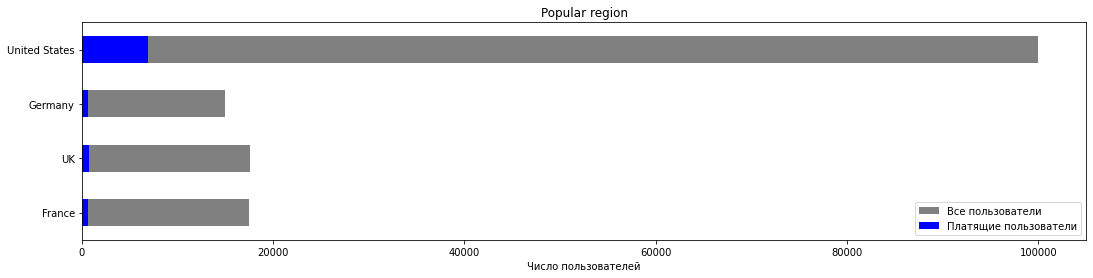

,total_users,total_payers,payer_per
device,,,
Mac,30042,1912,6.36
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05


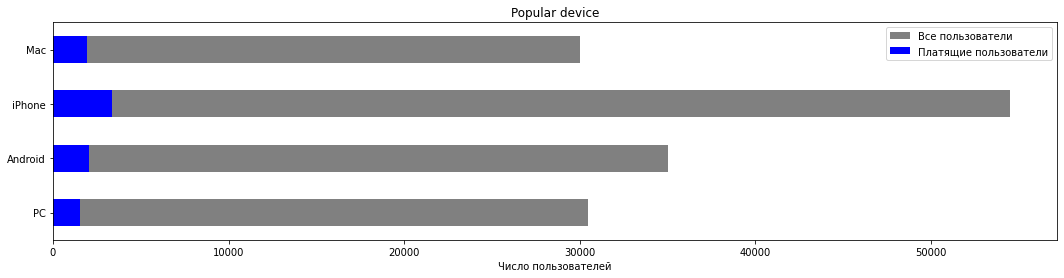

,total_users,total_payers,payer_per
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


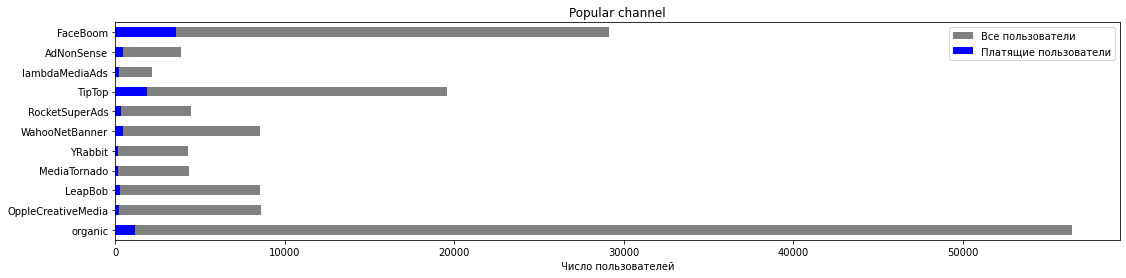

In [16]:
# зададим параметры пользователей для оценки
parameters = ['region', 'device', 'channel']

# выведим таблицы и построим графики привлечения пользователей по заданным параметрам, в т.ч. платящих
for value in parameters:
    
    data = (
        users.groupby(value).agg({'user_id':'count', 'payer':'sum'})
        .rename(columns={'user_id': 'total_users', 'payer':'total_payers'})
    )
    data['payer_per'] = round(data['total_payers'] / data['total_users'] * 100,2)
    data = data.sort_values(by='payer_per')
    display(data.sort_values(by='payer_per', ascending=False))
    
    ax = data['total_users'].plot(kind='barh', color='grey', figsize=(18, 4))
    data['total_payers'].plot(kind='barh', color='blue', ax=ax)
    
    plt.title(f'Popular {value}')
    plt.xlabel('Число пользователей')
    plt.ylabel('')
    plt.legend(['Все пользователи','Платящие пользователи'])
    plt.show()

### Выводы  
<a id='analys_result'></a>
Больше всего платящих пользователей:
- приходит из **США**
- пользуются **Мac** (несмотря на то, что общее количество пользователей самое низкое) 
- приходят по рекламному каналу **FaceBoom**. 

Канал **TipTop** - второй по объему пришедших пользователей. Однако, по проценту платящих пользователей у этого канала только 4-ая строчка.

## Маркетинг
<a id='marketing'></a>

Выясним:
- Сколько денег потратили пользователи? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Расходы на маркетинг
<a id='marketing_cost'></a>

Суммарно потрачено на рекламу - 105497


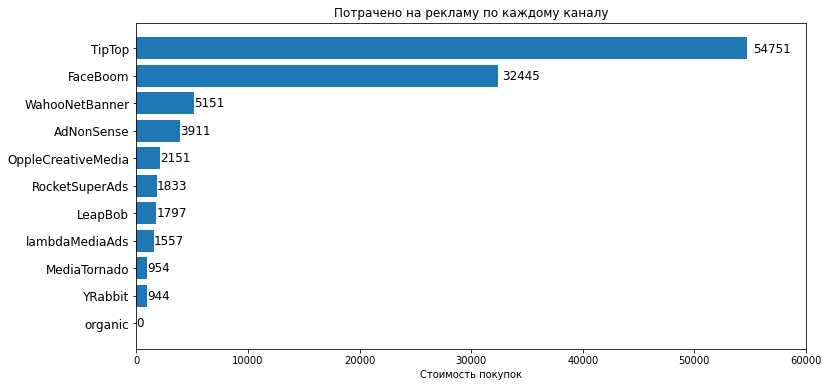

In [17]:
print('Суммарно потрачено на рекламу -', int(users['acquisition_cost'].sum()))

# Траты на рекламу по каналам привлечения
fig, ax = plt.subplots(figsize=(12,6))

channel_total = (
    users.groupby('channel').agg({'acquisition_cost':'sum'})
    .sort_values(by='acquisition_cost')
)

barh_plot = plt.barh(channel_total.index, channel_total['acquisition_cost'])

def autolabel_h(rects, data):
    for i, rect in enumerate(rects):
        width = rect.get_width()
        ax.text(width*1.01, rect.get_y() + rect.get_height()/2.,
                int(data[i]),
                ha='left', va='center', size=12)
       
autolabel_h(barh_plot, channel_total['acquisition_cost'])

plt.title('Потрачено на рекламу по каждому каналу')
plt.xlabel('Стоимость покупок')
plt.ylabel('')
plt.xticks(np.arange(0,70000,10000))
plt.tick_params(axis='y', labelsize=12)

plt.show()

Больше всего расходов на рекламу приходится на **TipTop** (55 тыс.) и **FaceBoom** (32,5 тыс). При этом, общая стоимость рекламы по всем остальным восьми каналам составляет всего 17% от общих расходов на рекламу. 

Посмотрим на динамику расходов по каналам привлечения.

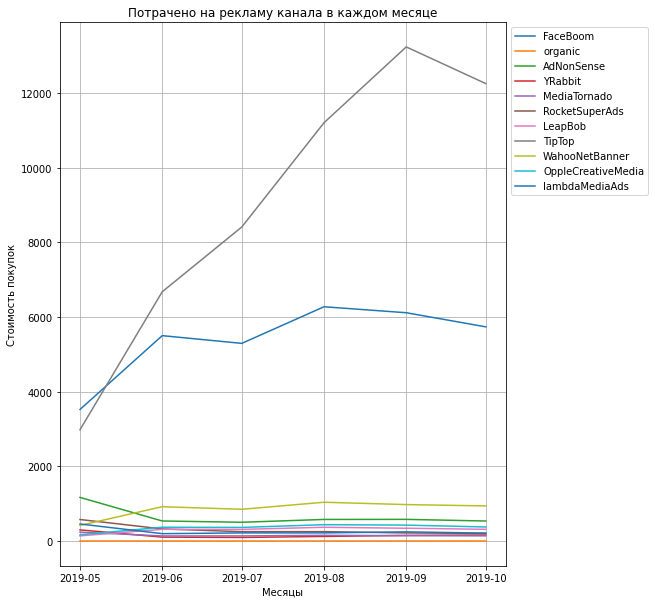

In [18]:
# динамика трат на рекламу по каналам привлечения
fig=plt.figure(figsize=(8,10))
for channel in users['channel'].unique():
    data = users[users['channel'] == channel].groupby('month')['acquisition_cost'].sum()
    plt.plot(data.index, data, label=channel)
    plt.grid()
    plt.legend()
    plt.title('Потрачено на рекламу канала в каждом месяце')
    plt.xlabel('Месяцы')
    plt.ylabel('Стоимость покупок')
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', ncol=1)
#     plt.xlim(5,10)
#     plt.yticks(np.arange(0, 10000, 1000))
plt.show()

Расходы на рекламу канала **TipTop** за исследуемый период (6 месяцев) выросли более чем в 4 раза.   
Ежемесячные расходы на рекламу **FaceBoom** достаточно стаблильны - 4-6 тыс.   
Расходы по остальным восьми каналам стабильны и не привышают 1 тыс. в месяц:
- AdNonSense
- lambdaMediaAds
- RocketSuperAds
- WahooNetBanner-
- YRabbit 
- MediaTornado
- LeapBob
- OppleCreativeMedia

### Стоимость привлечения пользователей
<a id='marketing_visitors'></a>

In [19]:
# Сколько в среднем стоило привлечение одного покупателя из каждого источника
print('В среднем стоимость привлечения одного покупателя (САС) -', round(users['acquisition_cost'].mean(), 2))
(
    users.groupby('channel').agg({'acquisition_cost':'mean', 'user_id':'count'})
    .rename(columns={'user_id':'total_users'})
    .sort_values(by='acquisition_cost', ascending=False)
)

В среднем стоимость привлечения одного покупателя (САС) - 0.7


,acquisition_cost,total_users
channel,,
TipTop,2.799003,19561
FaceBoom,1.113286,29144
AdNonSense,1.008054,3880
lambdaMediaAds,0.724802,2149
WahooNetBanner,0.602245,8553
RocketSuperAds,0.412095,4448
OppleCreativeMedia,0.250000,8605
YRabbit,0.218975,4312
MediaTornado,0.218717,4364


Дороже всех обходятся пользователи канала **TipTop** - 2.8.    
**Faceboom** привлек в 1,5 раза больше пользователей, чем TipTop. При этом стоимость привлечения одного клиента у него в 2,5 раза ниже.  
Стоимость канала **AdNonSense** всего на 10% ниже, чем Faceboom, а количество привлеченных пользователей в 7,5 раз меньше. 
Можно выделить каналы со средней стоимостью (0,4-0,75) - **lambdaMediaAds**, **WahooNetBanner**, **RocketSuperAds** и каналы с низкой стоимостью - **OppleCreativeMedia**, **YRabbit**, **MediaTornado**, **LeapBob**.  
Большое количество органических пользователей - 38%.

### Выводы
<a id='marketing_result'></a>

1. Топ самых дорогих рекламных каналов возглавляет **TipTop**, как по стоимости привлечения одного клиента (2,8), так и по суммарным расходам за период 6 месяцев (55 тыс.). Кроме того ежемесячные расходы на рекламу канала TipTop за период 6 месяцев выросли более чем в 4 раза.
2. Суммарные расходы на **FaceBoom** ниже (32,5 тыс), как и стоимость привлечения одного клиента (1,1). Однако, канал привлек в 1,5 раза больше пользователей, чем TipTop. Ежемесячные расходы на рекламу канала достаточно стаблильны - 4-6 тыс.
3. Канал **AdNonSense** чуть дешевле (1,0) FaceBoom, однако привлекает в 7,5 раз меньше пользователей.
3. По остальным семи каналам:
    - стоимость одного пользователя от 0,21 до 0,72
    - ежемесячные затраты до 1 тыс.
    - сумма расходов за 6 месяцев от 9,4 тыс. до 5,1 тыс.
    - количество привлеченных пользователей от 3,8 тыс. до 8,6 тыс.
4. По соотношению цена/число привлеченных пользователей хорошие показатели у каналов **LeapBob** и **OppleCreativeMedia**.
5. **Органических** пользователей - 38%

## Оценка окупаемости рекламы для привлечения пользователей
<a id='roi'></a>

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Моментом анализа будем считать 1 ноября 2019 года. Срок окупаемости, предположим - не позднее, чем через 2 недели после привлечения пользователей.

In [20]:
# задаем момент анализа и горизонт
analys_date = datetime(2019,11,1).date()
analys_horizon = 14

### Анализ общей окупаемости рекламы
<a id='roi_total'></a>

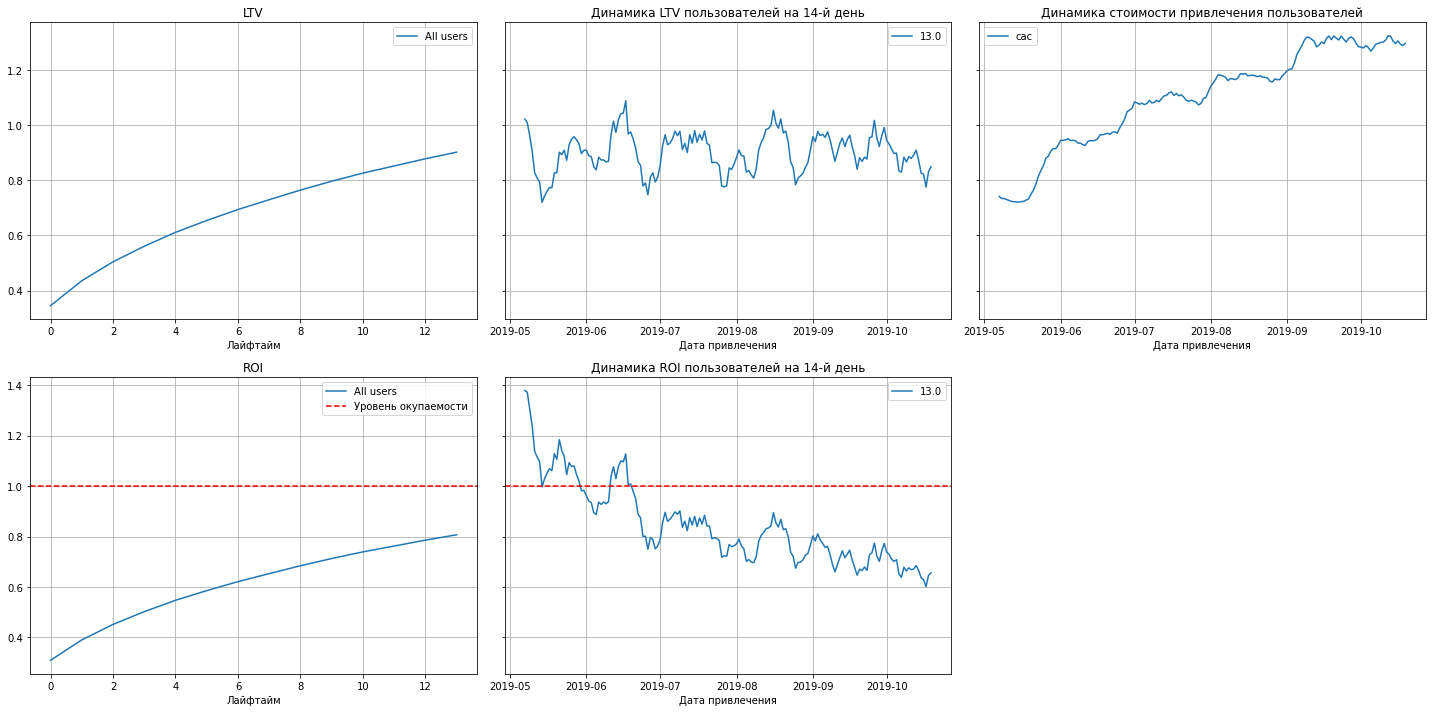

In [21]:
# Получим данные ltv и roi
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(users, orders, analys_date, analys_horizon)
# построим графики ltv, динамики ltv, динамики стоимости привлечения, roi и динамики roi
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analys_horizon, window=7)

Рост _LTV_ составляет 0,9 к концу второй недели жизни пользователей, _САС_ равен 1,0. Окупаемости инвестиций в рекламу не происходит. При этом, в мае и июне вложения еще окупались, но с июля по октябрь - стабильно нет.

Необходимо разбираться с неэффективностью рекламы.

### Анализ окупаемости рекламы с разбивкой по устройствам
<a id='roi_device'></a>

,cohort_size
device,
Android,20683
Mac,17747
PC,18128
iPhone,32086


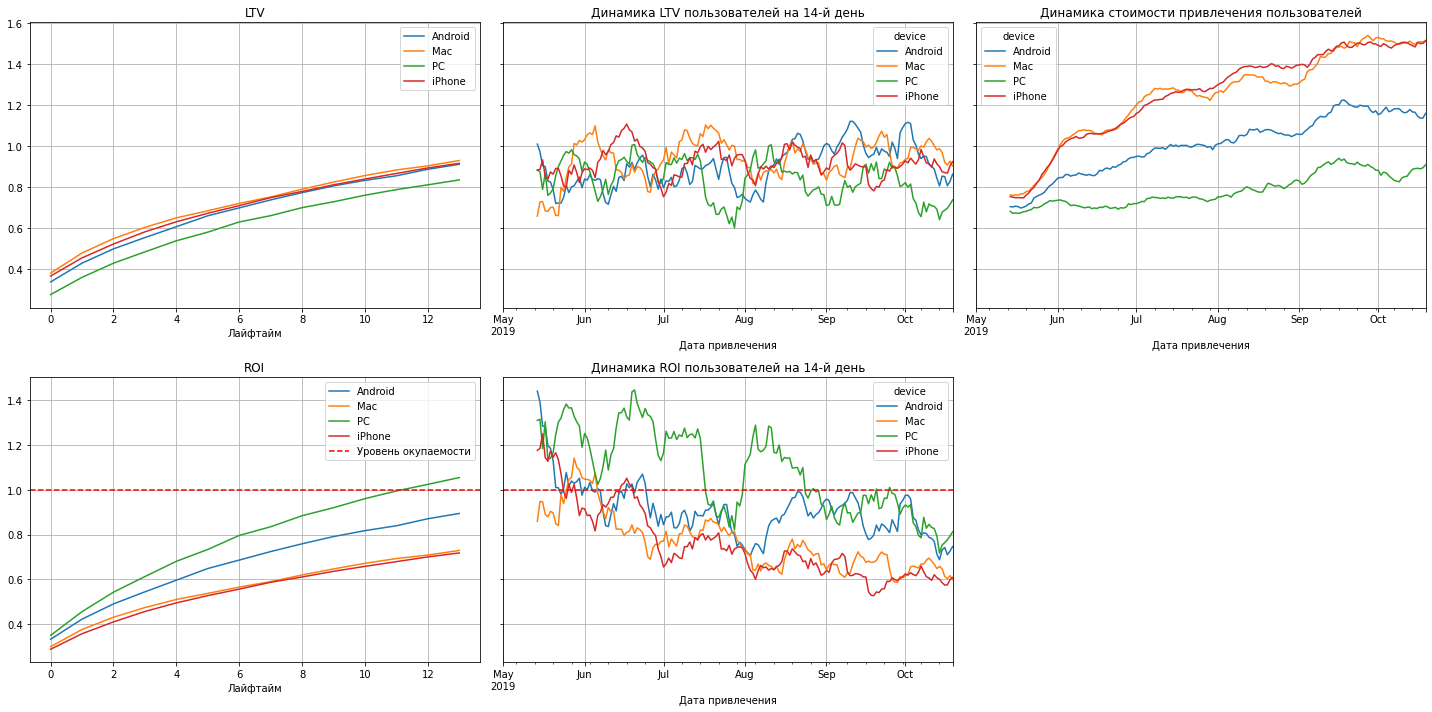

In [22]:
# считаем LTV и ROI с разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    users, orders, analys_date, analys_horizon, dimensions=['device']
)
display(ltv[['cohort_size']])
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analys_horizon, window=14)

_LTV_ пользователей **Maс**, **iPhone** и **Android** - 0,9 и пользователей **PC** - 0,82. При этом окупаемость наблюдается только у привлеченных пользователей **РС** - всего на 10%, которая к тому же падает в сентябре и октябре 2019 года и перестает окупаться.  
Привлечение пользователей **Maс** и **iPhone** обходится одиноково и дороже других, и эти растущие затраты одниково не окупаются.  
Количество пользователей **iPhone** более чем в 1,5 раза больше других.

### Анализ окупаемости рекламы с разбивкой по странам
<a id='roi_region'></a>

,cohort_size
region,
France,10516
Germany,9030
UK,10536
United States,58562


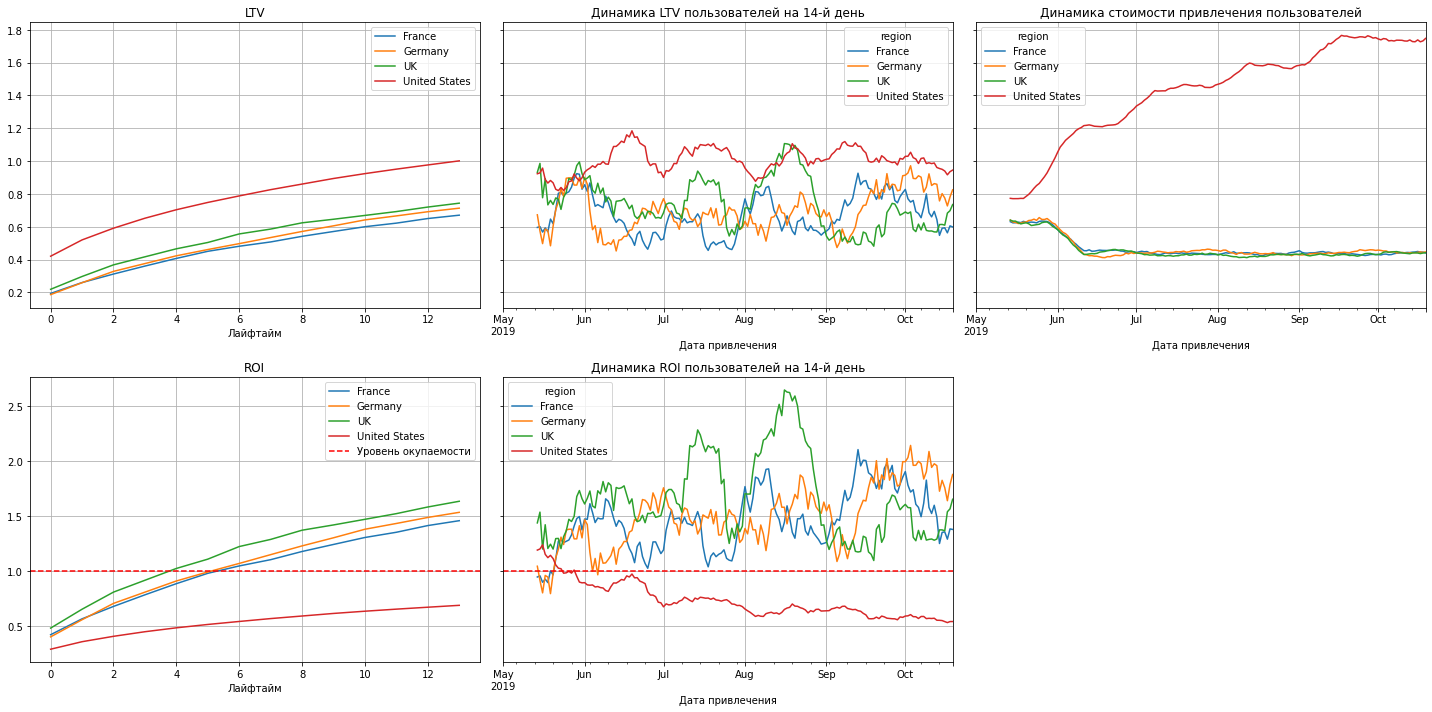

In [23]:
# считаем LTV и ROI с разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    users, orders, analys_date, analys_horizon, dimensions=['region']
)
display(ltv[['cohort_size']])
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analys_horizon, window=14)

Пользователи из **США** имеют больший _LTV_ по сравнению с другими регионами - 1,0. Однако стоимость их привлечения слишком сильно растет и не окупается.  
Остальные страны (**Франция**, **Германия** и **Великобритания**), хоть и имеют более низкий _LTV_ равный 0,7, имеют существенно более низкую стоимость привлечения, а также стабильную окупаемость на 50%. Количество пользоватей из этих стран примерно одинаковые ок. 10 тыс. человек.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам
<a id='roi_channel'></a>

,cohort_size
channel,
AdNonSense,3702
FaceBoom,27544
LeapBob,8103
MediaTornado,4167
OppleCreativeMedia,8139
RocketSuperAds,4251
TipTop,18498
WahooNetBanner,8082
YRabbit,4102


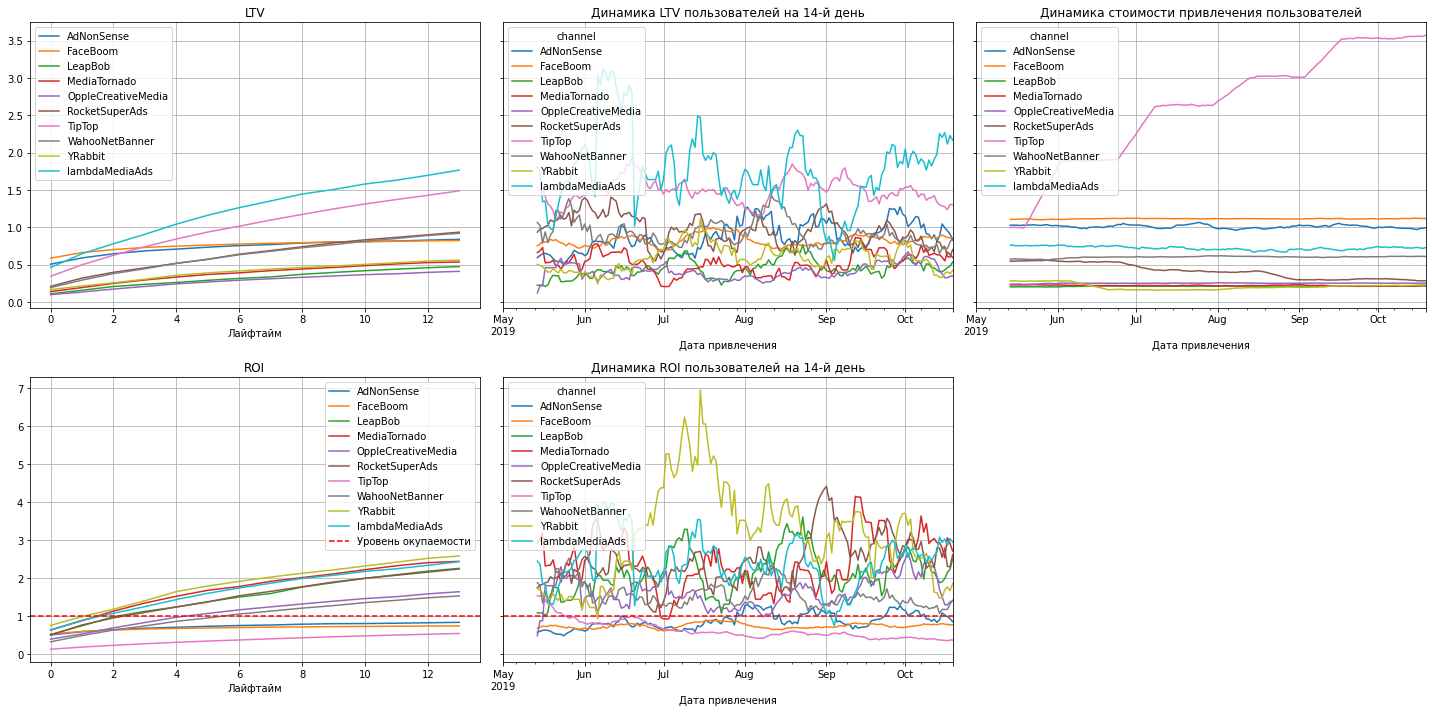

In [24]:
# считаем LTV и ROI с разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    users, orders, analys_date, analys_horizon, dimensions=['channel']
)
display(ltv[['cohort_size']])
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analys_horizon, window=14)

_LTV_ пользователей **TipTop** (1,5) уступает только _LTV_ пользователей **lambdaMediaAds** (1,8). Но за счет слишком большого роста стоимости привлечения пользователей **TipTop**, вложения по этому каналу не окупаются. А вот инвестиции **lambdaMediaAds** окупаются более чем в 2 раза.  
Также не окупаются вложения в рекламу **FaceBoom** и **AdNonSense**, и роста _LTV_ по ним практически нет (0,5).    
А вот пользователи канала **RocketSuperAds** имеют неплохой _LTV_ (1,0), и инвестиции по этому каналу прилично окупаются - тоже более чем в 2 раза.  
Лучшую окупаемость (в 2,6 раз) у каналов **YRabbit**, **MediaTornado**, при этом они имеют самые низкие расходы на рекламу. Правда, их LTV всего 0,5.

### Конверсия пользователей
<a id='conv'></a>

Из данных исключен органический трафик.  
Момент анализа (01.11.2019) и горизонт (14 дней) прежние.

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,10516,3.31,3.75,4.10,4.27,4.43,4.54,4.61,4.64,4.70,4.75,4.76,4.81,4.83,4.84
Germany,9030,3.23,3.88,4.15,4.39,4.51,4.65,4.74,4.83,4.91,4.96,4.97,4.98,4.99,5.05
UK,10536,3.41,3.91,4.24,4.40,4.54,4.64,4.76,4.81,4.84,4.86,4.90,4.91,4.92,4.92
United States,58562,7.19,8.06,8.46,8.75,8.97,9.10,9.20,9.30,9.38,9.46,9.51,9.55,9.57,9.61


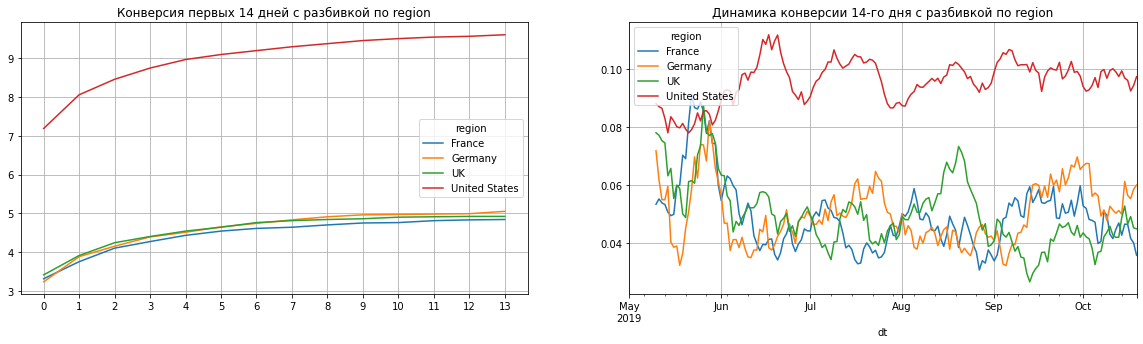

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20683,5.83,6.61,7.01,7.24,7.45,7.57,7.69,7.76,7.81,7.88,7.91,7.94,7.98,7.99
Mac,17747,6.43,7.30,7.68,7.93,8.10,8.23,8.32,8.40,8.47,8.56,8.63,8.65,8.66,8.71
PC,18128,4.66,5.31,5.60,5.81,6.03,6.16,6.27,6.34,6.41,6.44,6.47,6.49,6.51,6.54
iPhone,32086,6.28,7.02,7.41,7.71,7.89,8.03,8.10,8.21,8.29,8.35,8.40,8.44,8.46,8.50


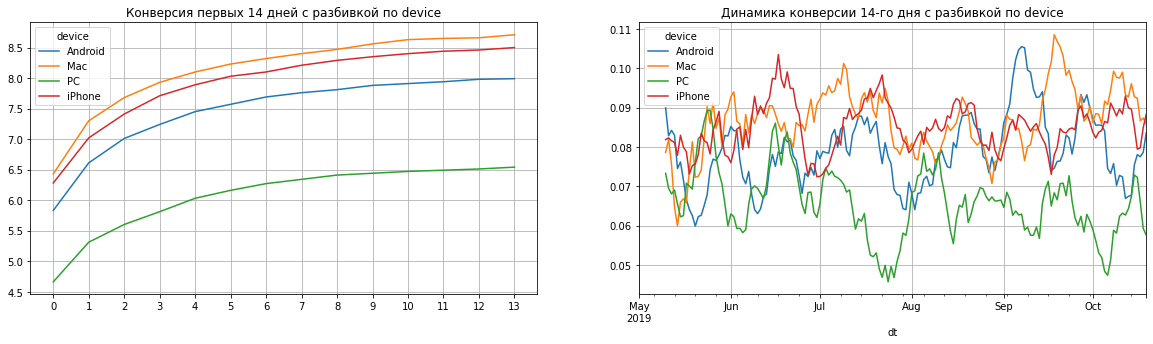

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,8.70,9.40,9.67,10.05,10.21,10.40,10.53,10.53,10.59,10.62,10.62,10.70,10.75,10.75
FaceBoom,27544,10.21,10.91,11.15,11.33,11.48,11.55,11.65,11.70,11.76,11.82,11.85,11.89,11.91,11.94
LeapBob,8103,1.67,2.06,2.41,2.51,2.60,2.67,2.69,2.76,2.83,2.86,2.89,2.90,2.91,2.92
MediaTornado,4167,2.33,2.74,2.81,3.00,3.05,3.12,3.12,3.24,3.26,3.26,3.34,3.34,3.34,3.34
OppleCreativeMedia,8139,1.73,1.99,2.15,2.31,2.37,2.46,2.53,2.56,2.56,2.58,2.59,2.60,2.60,2.63
RocketSuperAds,4251,3.41,4.73,5.39,5.93,6.37,6.56,6.73,6.87,6.99,7.15,7.29,7.32,7.34,7.36
TipTop,18498,5.67,6.94,7.61,8.07,8.42,8.66,8.77,8.94,9.06,9.16,9.23,9.28,9.32,9.37
WahooNetBanner,8082,3.12,3.85,4.33,4.50,4.69,4.80,4.89,4.97,5.04,5.11,5.15,5.16,5.17,5.21
YRabbit,4102,2.58,2.88,3.12,3.22,3.34,3.41,3.49,3.53,3.58,3.63,3.63,3.66,3.68,3.71


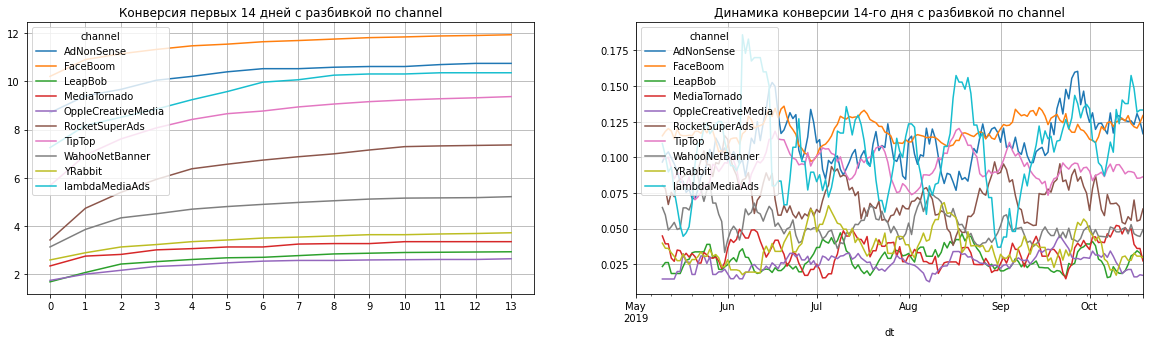

In [25]:
# Конверсии пользователей по региону, утсройству и рекламному каналу
parameters={'region':10, 'device':10, 'channel':10}
list(parameters.keys())

for key in parameters.keys():

    # получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
    conversion_raw, conversion, conversion_history = get_conversion(
                                                                    users,
                                                                    orders,
                                                                    analys_date,
                                                                    analys_horizon,
                                                                    dimensions=[key]
    )
    # выведем таблицу конверсии в процентах
    data = conversion
    data.loc[:, 0:13] = round(data.loc[:, 0:13]*100,2)
    display(data)

    plt.figure(figsize=(20, 5)) # размер сетки для графиков

    # в одной ячейке — кривые конверсии
    report = conversion.drop(columns=['cohort_size'])
    report.T.plot(
        grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
    )
    plt.title(f'Конверсия первых 14 дней с разбивкой по {key}')

    # во второй ячейке - график истории изменений
    report_history = (
        conversion_history[analys_horizon-1].reset_index()
        .pivot_table(index='dt', columns=key, values=(analys_horizon-1), aggfunc='mean')
        .fillna(0)
    )
    # применим сглаживание  
    filter_data(report_history, window=parameters[key]).plot(grid=True, ax=plt.subplot(1, 2, 2))    
    plt.title(f'Динамика конверсии 14-го дня с разбивкой по {key}')
    plt.show()

Конверсия среди пользователей из **США** (до 10%) примерно в 2 раза выше, чем в остальных регионах (**Германия**, **Великобритания** и **Франция**).  
Конверсия пользователей, использующих **Mac**, самая высокая (до 9%). А использующих PC (6,5%) - существенно ниже других.
Конверсия пользователей **FaceBoom** (ок. 12%) превосходит другие каналы рекламы. Также достаточно неплохие показатели у каналов **AdNonSence** - 11%, **lambdaMediaAid**s - 10.5% и **TipTop** - 9.5%.

Для анализа удержания пользователей построим кривые удрежания по платящим и неплатящим пользователям в зависимости от региона, устройства и рекламного канала.

### Удержание пользователей
<a id='ret'></a>

cohort_size      0      1      2      3      4      5  \
payer region                                                                 
False France                9993  100.0  17.30   9.12   5.20   3.37   2.26   
      Germany               8563  100.0  17.67   8.49   5.62   3.50   2.52   
      UK                   10002  100.0  17.91   8.86   5.14   3.20   2.46   
      United States        52776  100.0  17.72   8.56   5.12   3.35   2.50   
True  France                 523  100.0  47.42  38.62  32.31  30.78  29.64   
      Germany                467  100.0  48.39  40.26  31.48  32.76  28.48   
      UK                     534  100.0  48.31  42.13  32.77  29.96  27.72   
      United States         5786  100.0  35.48  26.39  21.28  18.37  16.63   

                         6      7      8      9     10     11     12     13  
payer region                                                                 
False France          1.82   1.46   1.21   1.06   0.78   0.63   0.53   0.55  
      Germany         1.95   1.40   1.05   0.99   0.70   0.57   0.69   0.65  
      UK              1.77   1.59   1.16   0.85   0.73   0.69   0.64   0.45  
      United States   1.88   1.38   1.19   0.95   0.75   0.64   0.59   0.43  
True  France         24.67  23.90  22.37  20.46  21.03  16.83  18.93  17.40  
      Germany        24.41  22.06  23.98  21.20  23.34  17.34  16.06  13.49  
      UK             27.15  24.72  19.85  15.54  16.85  19.29  18.35  17.79  
      United States  14.36  13.60  12.55  12.24  11.72  10.70  10.30   8.95

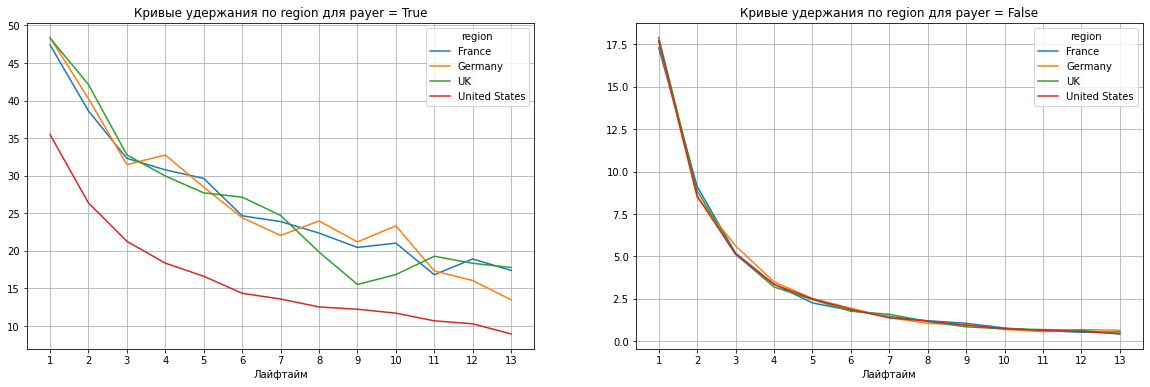

cohort_size      0      1      2      3      4      5      6  \
payer device                                                                  
False Android        18988  100.0  17.50   8.65   5.19   3.13   2.40   1.75   
      Mac            16150  100.0  17.92   8.56   4.94   3.31   2.39   1.95   
      PC             16920  100.0  17.47   8.72   5.24   3.46   2.42   1.78   
      iPhone         29276  100.0  17.81   8.68   5.28   3.45   2.59   1.94   
True  Android         1695  100.0  38.47  29.85  25.01  21.42  20.65  15.63   
      Mac             1597  100.0  36.51  28.43  20.29  19.66  17.22  14.84   
      PC              1208  100.0  42.14  33.36  26.24  26.16  20.94  22.52   
      iPhone          2810  100.0  37.05  27.72  23.38  19.36  18.51  15.84   

                   7      8      9     10     11     12     13  
payer device                                                    
False Android   1.38   1.11   1.00   0.77   0.65   0.55   0.51  
      Mac       1.46   1.28   0.91   0.80   0.64   0.63   0.40  
      PC        1.45   1.12   0.87   0.70   0.54   0.59   0.56  
      iPhone    1.40   1.19   0.99   0.73   0.68   0.63   0.44  
True  Android  16.64  14.69  13.75  13.27  11.09  12.86  10.74  
      Mac      14.28  13.65  13.21  12.09  11.52  10.90  11.08  
      PC       19.21  17.55  14.98  16.39  14.82  14.40  12.42  
      iPhone   14.41  13.59  13.24  13.20  12.10  10.75   9.18

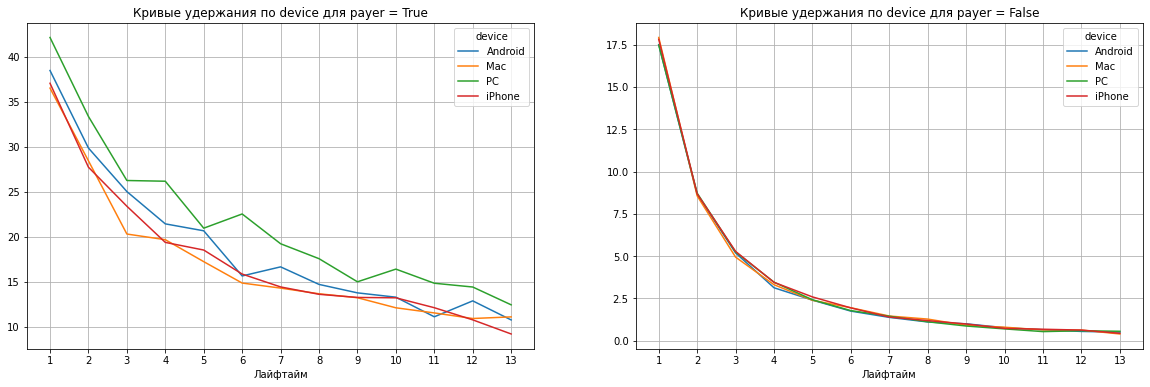

cohort_size      0      1      2      3      4  \
payer channel                                                              
False AdNonSense                 3289  100.0  17.63   8.76   5.11   3.71   
      FaceBoom                  24182  100.0  17.30   8.72   5.08   3.27   
      LeapBob                    7860  100.0  17.11   9.13   5.13   3.24   
      MediaTornado               4019  100.0  18.31   8.24   5.65   2.86   
      OppleCreativeMedia         7919  100.0  17.20   8.90   5.34   3.22   
      RocketSuperAds             3916  100.0  17.52   8.58   5.13   3.55   
      TipTop                    16713  100.0  18.17   8.46   5.09   3.49   
      WahooNetBanner             7654  100.0  18.42   8.54   5.30   3.45   
      YRabbit                    3946  100.0  18.02   8.34   4.92   3.52   
      lambdaMediaAds             1836  100.0  18.30   8.66   6.26   3.32   
True  AdNonSense                  413  100.0  28.57  16.22  13.08   7.75   
      FaceBoom                   3362  100.0  22.25  12.31   7.53   5.74   
      LeapBob                     243  100.0  55.56  49.38  39.51  33.33   
      MediaTornado                148  100.0  50.00  45.27  35.14  34.46   
      OppleCreativeMedia          220  100.0  53.64  45.91  40.00  39.55   
      RocketSuperAds              335  100.0  57.31  46.87  40.00  39.40   
      TipTop                     1785  100.0  53.28  46.44  40.90  35.24   
      WahooNetBanner              428  100.0  55.37  51.17  38.79  44.86   
      YRabbit                     156  100.0  56.41  38.46  39.74  37.18   
      lambdaMediaAds              220  100.0  56.36  49.09  39.55  37.27   

                              5      6      7      8      9     10     11  \
payer channel                                                               
False AdNonSense           2.16   1.89   1.67   1.12   1.12   0.61   0.55   
      FaceBoom             2.53   1.98   1.36   1.19   1.00   0.81   0.55   
      LeapBob              2.32   1.88   1.45   1.09   1.04   0.73   0.66   
      MediaTornado         2.49   1.87   1.17   1.59   0.85   0.72   0.90   
      OppleCreativeMedia   2.63   1.92   1.45   1.19   0.85   0.83   0.56   
      RocketSuperAds       2.07   1.51   1.63   0.87   0.77   0.72   0.84   
      TipTop               2.60   1.88   1.39   1.21   0.96   0.72   0.67   
      WahooNetBanner       2.22   1.75   1.50   1.18   0.95   0.71   0.67   
      YRabbit              2.38   1.62   1.42   0.99   0.84   0.63   0.63   
      lambdaMediaAds       3.10   1.63   1.42   1.09   0.93   0.76   0.87   
True  AdNonSense           6.05   5.81   4.84   5.57   4.84   1.69   2.42   
      FaceBoom             4.13   3.87   2.83   2.05   2.26   1.78   1.37   
      LeapBob             39.51  28.81  24.69  27.16  25.10  27.98  23.87   
      MediaTornado        35.14  25.00  22.97  21.62  17.57  22.97  22.97   
      OppleCreativeMedia  31.36  33.64  27.27  23.64  22.73  24.09  22.27   
      RocketSuperAds      33.13  32.24  32.54  26.27  28.66  31.64  22.69   
      TipTop              34.57  28.85  28.74  27.79  26.27  24.87  24.09   
      WahooNetBanner      38.32  33.88  34.58  31.31  25.93  30.84  26.87   
      YRabbit             27.56  26.28  23.08  26.28  26.28  21.79  21.15   
      lambdaMediaAds      37.27  34.09  32.73  27.27  21.36  22.27  18.18   

                             12     13  
payer channel                           
False AdNonSense           0.70   0.67  
      FaceBoom             0.66   0.43  
      LeapBob              0.53   0.48  
      MediaTornado         0.45   0.50  
      OppleCreativeMedia   0.72   0.57  
      RocketSuperAds       0.38   0.28  
      TipTop               0.61   0.42  
      WahooNetBanner       0.63   0.54  
      YRabbit              0.46   0.51  
      lambdaMediaAds       0.33   0.54  
True  AdNonSense           3.39   2.66  
      FaceBoom             1.25   1.25  
      LeapBob             22.22  20.99  
      MediaTornado        16.22  12.16  
  

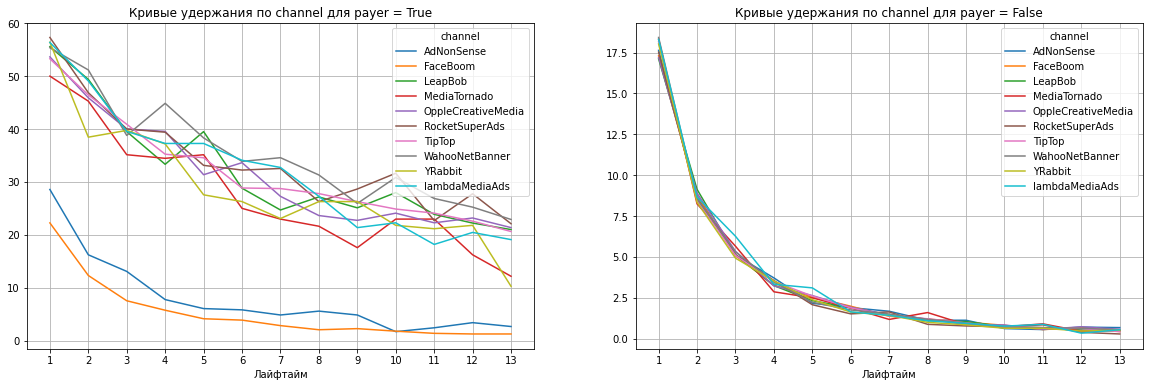

In [26]:
# Кривые удержания пользователей (платящих и неплатящих) по региону, устройству и рекламному каналу
parameters = ['region', 'device', 'channel']

for value in parameters:

    # получаем сырые данные, таблицу удержания и таблицу динамики удержания
    retention_raw, retention, retention_history = get_retention(
                                                                    users,
                                                                    visits,
                                                                    analys_date,
                                                                    analys_horizon,
                                                                    dimensions=[value],
                                                                    ignore_horizon=False,
                                                                ) 

    # выведем таблицу удержания в процентах
    data = retention
    data.loc[:, 0:13] = round(data.loc[:, 0:13]*100,2)
    display(data)

    # строим кривые удержания
    plt.figure(figsize=(20, 6))  # задаём размер сетки
    
    
    # исключаем размеры когорт и удержание первого дня
    report = retention.drop(columns=['cohort_size', 0])
    
    for i, payer in enumerate(users['payer'].unique()):

        report.query('payer == @payer').droplevel('payer').T.plot(
            grid=True, xticks=list(report.columns.values), ax = plt.subplot(1, 2, i+1)
        ) 
        
        plt.xlabel('Лайфтайм')
        plt.title('Кривые удержания по {} для payer = {}'.format(value, payer))
    plt.show()

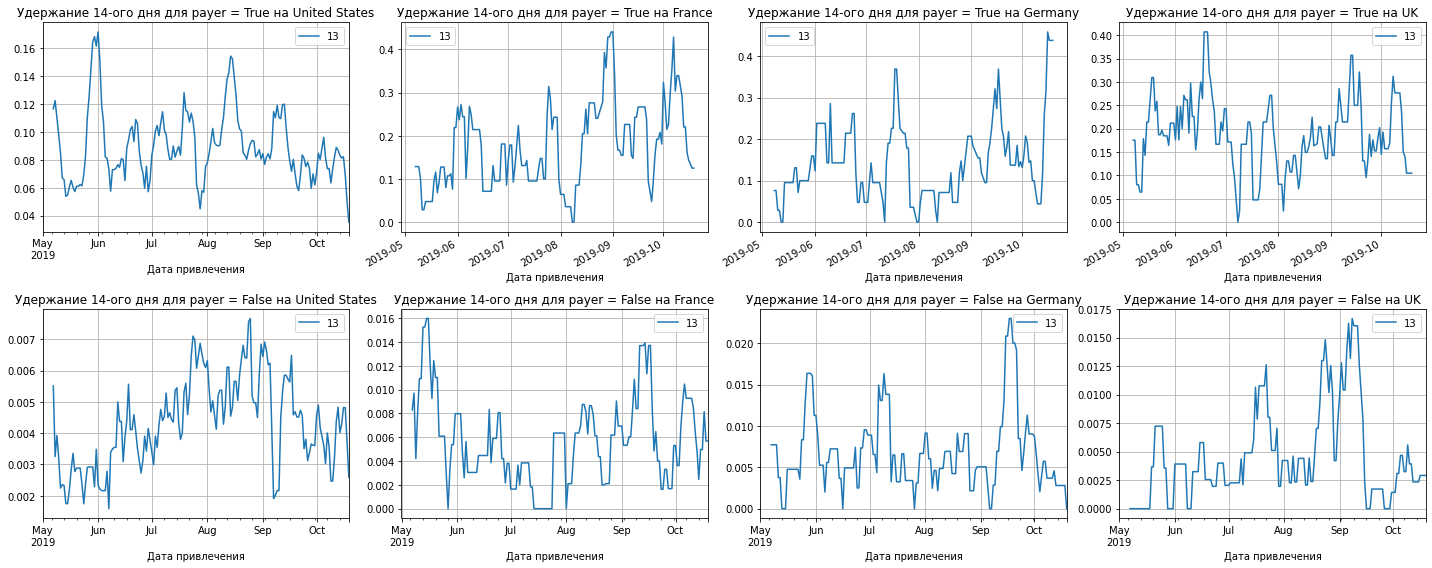

In [27]:
# История изменений удержнания пользователей по региону
retention_raw, retention, retention_history = get_retention(
                                                                users,
                                                                visits,
                                                                analys_date,
                                                                analys_horizon,
                                                                dimensions=['region'],
                                                                ignore_horizon=False,
                                                            ) 

# строим графики истории изменений

plt.figure(figsize=(20, 8))

# берём таблицу динамики удержания retention_history
# исключаем размеры когорт и удержание 1-13 дней
report = retention_history.drop(columns=['cohort_size', 0,1,2,3,4,5,6,7,8,9,10,11,12])

num_rows = len(users['payer'].unique())
num_cols = len(users['region'].unique())

for i, payer in enumerate(users['payer'].unique()):
    for j, region in enumerate(users['region'].unique()):
        report_history = (
            report.query('payer == @payer and region == @region')
            .droplevel(['payer', 'region'])
        )
        # применим сглаживание
        filter_data(report_history, window=7).plot(grid=True, ax=plt.subplot(num_rows, num_cols, i * num_cols + j + 1))
        
        plt.xlabel('Дата привлечения')
        plt.title('Удержание 14-ого дня для payer = {} на {}'.format(payer, region))
plt.tight_layout()
plt.show()

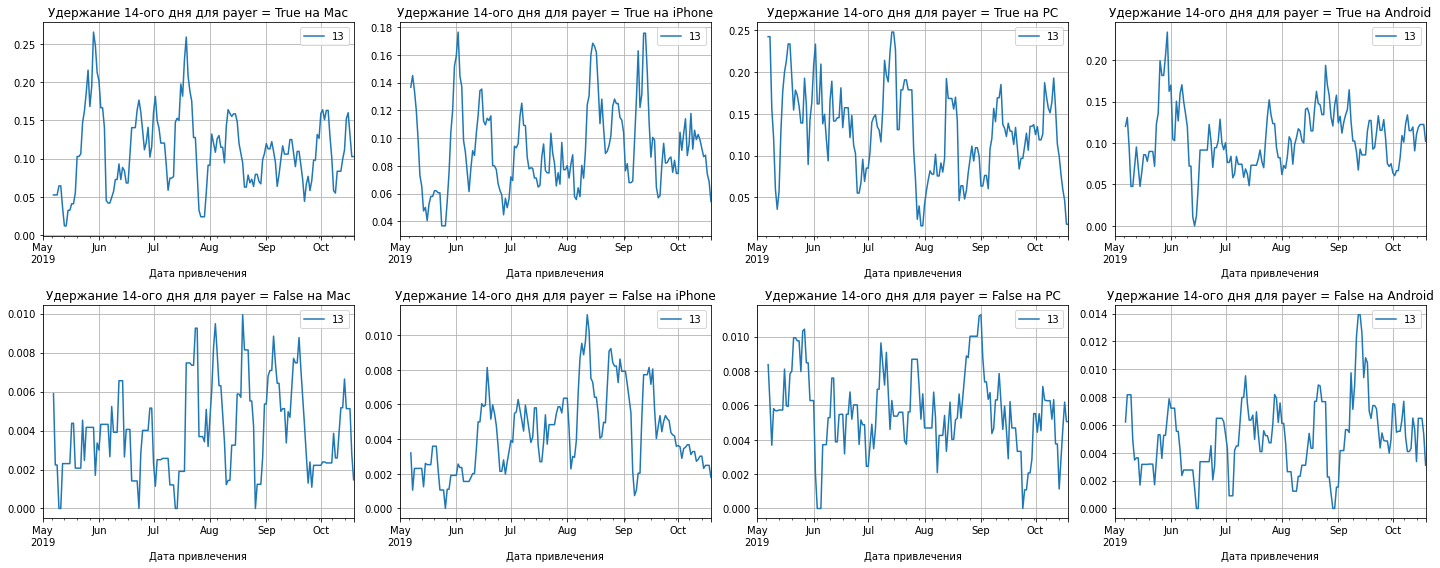

In [28]:
# История изменений удержнания пользователей по устройству
retention_raw, retention, retention_history = get_retention(
                                                                users,
                                                                visits,
                                                                analys_date,
                                                                analys_horizon,
                                                                dimensions=['device'],
                                                                ignore_horizon=False,
                                                            ) 
# строим графики истории изменений

plt.figure(figsize=(20, 8))

# берём таблицу динамики удержания retention_history
# исключаем размеры когорт и удержание 1-13 дней
report = retention_history.drop(columns=['cohort_size', 0,1,2,3,4,5,6,7,8,9,10,11,12])

num_rows = len(users['payer'].unique())
num_cols = len(users['device'].unique())

for i, payer in enumerate(users['payer'].unique()):
    for j, device in enumerate(users['device'].unique()):
        report_history = (
            report.query('payer == @payer and device == @device')
            .droplevel(['payer', 'device'])
        )
        # применим сглаживание
        filter_data(report_history, window=7).plot(grid=True, ax=plt.subplot(num_rows, num_cols, i * num_cols + j + 1))
        
        plt.xlabel('Дата привлечения')
        plt.title('Удержание 14-ого дня для payer = {} на {}'.format(payer, device))
plt.tight_layout()
plt.show()

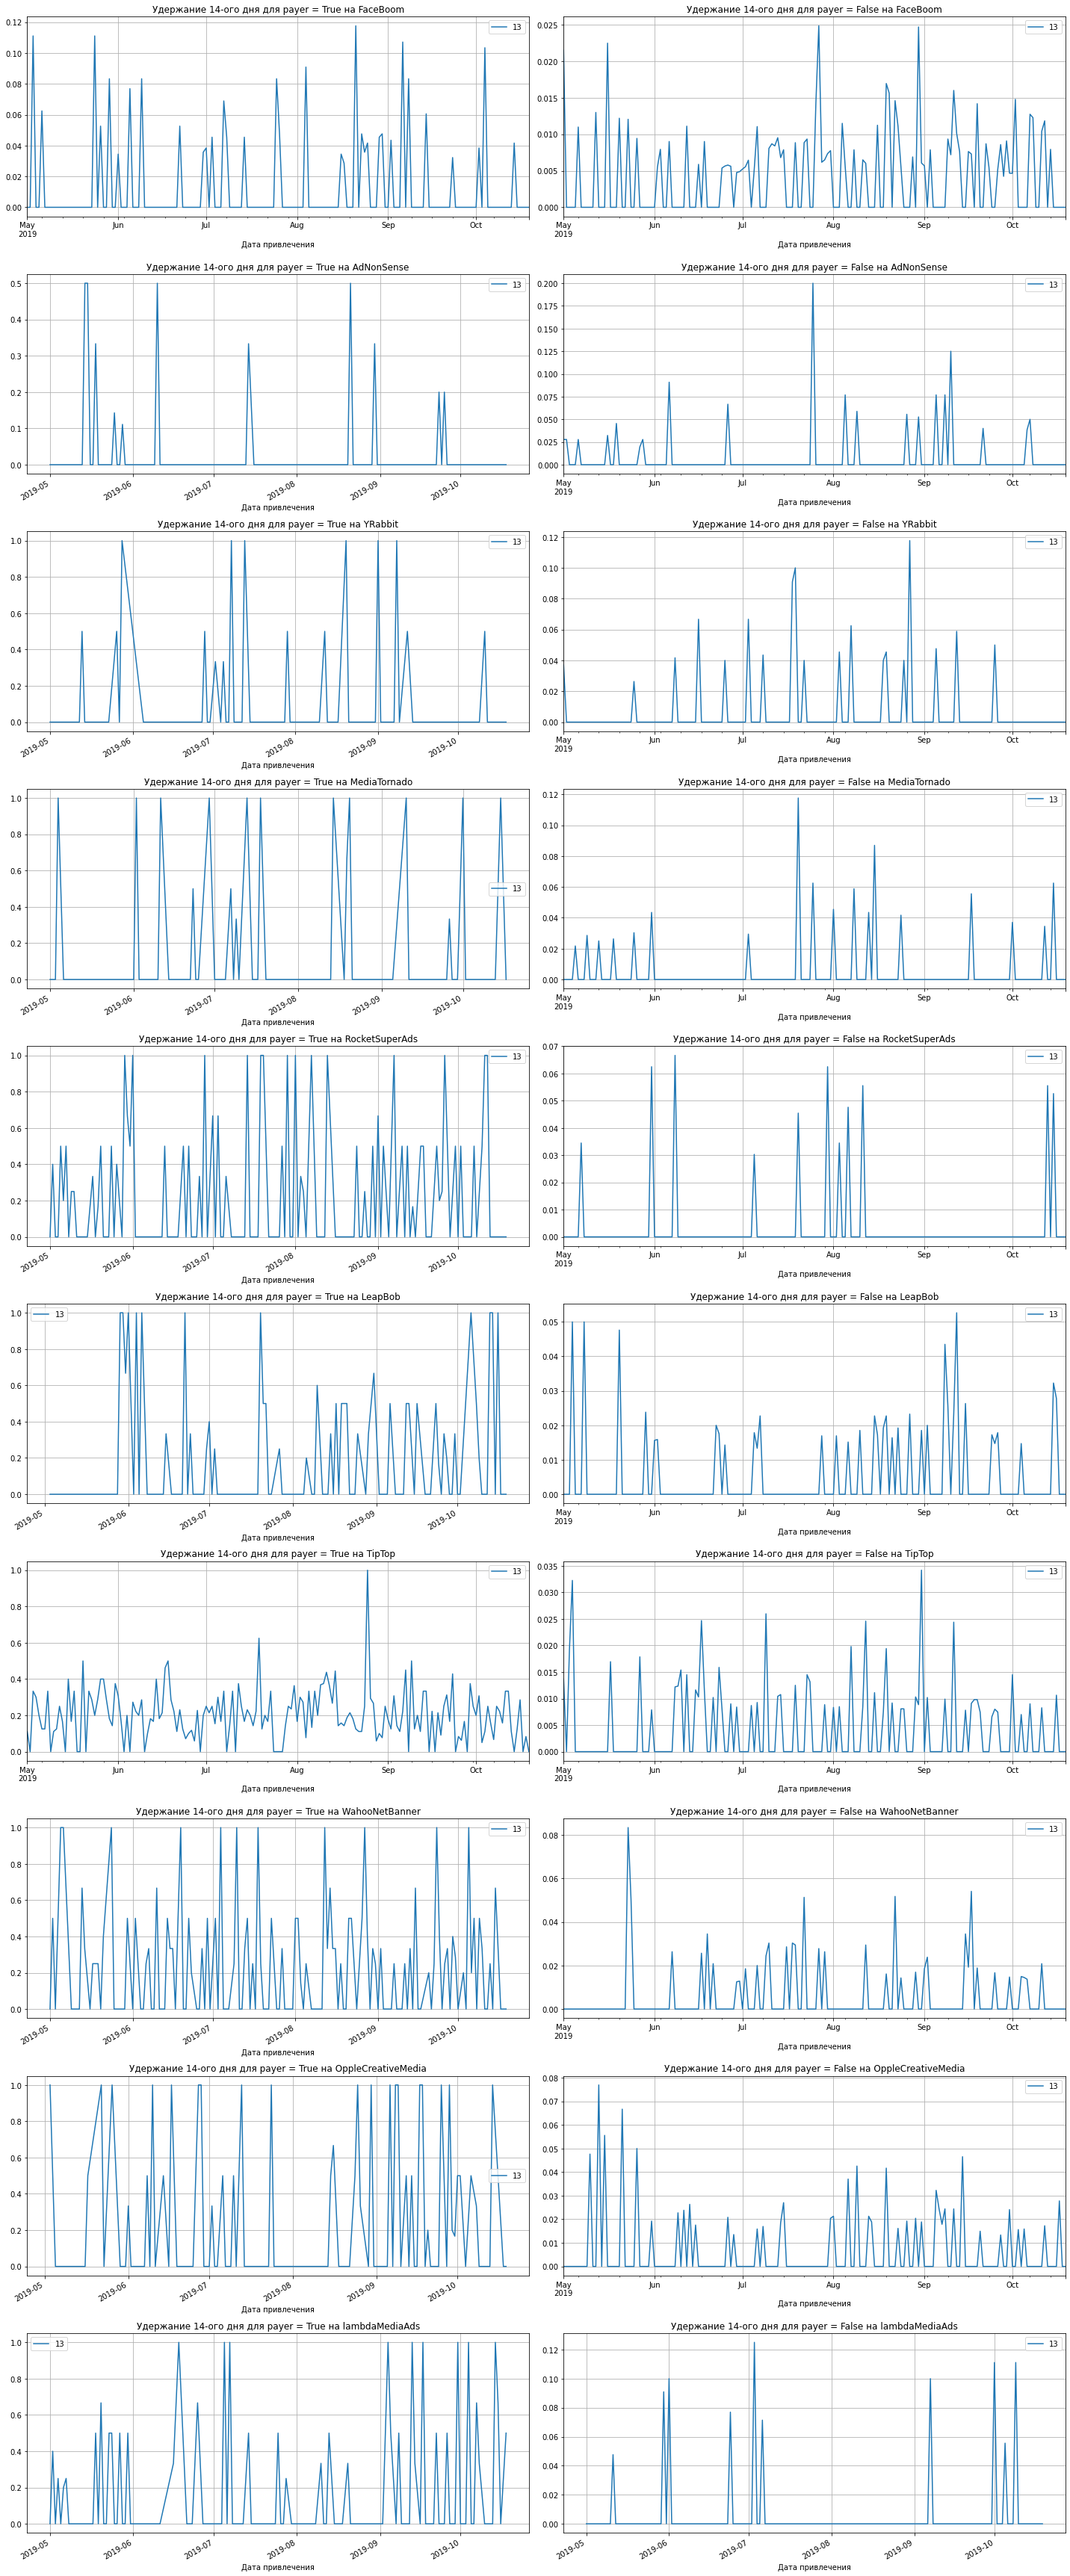

In [29]:
# История изменений удержнания пользователей по рекламному каналу
retention_raw, retention, retention_history = get_retention(
                                                                users,
                                                                visits,
                                                                analys_date,
                                                                analys_horizon,
                                                                dimensions=['channel'],
                                                                ignore_horizon=False,
                                                            ) 
# строим графики истории изменений

plt.figure(figsize=(20, 48))

# берём таблицу динамики удержания retention_history
# исключаем размеры когорт и удержание 1-13 дней
report = retention_history.drop(columns=['cohort_size', 0,1,2,3,4,5,6,7,8,9,10,11,12])

num_rows = len(retention_raw['channel'].unique())
num_cols = len(retention_raw['payer'].unique())

for i, payer in enumerate(retention_raw['payer'].unique()):
    for j, channel in enumerate(retention_raw['channel'].unique()):
        report_history = (
            report.query('payer == @payer and channel == @channel')
            .droplevel(['payer', 'channel'])
        )
        report_history.plot(grid=True, ax=plt.subplot(num_rows, num_cols, j * num_cols + i + 1))
        
        plt.xlabel('Дата привлечения')
        plt.title('Удержание 14-ого дня для payer = {} на {}'.format(payer, channel))
plt.tight_layout()
plt.show()

Удержание пользователей из **Германии**, **Великобритании** и **Франции** - примерно одинаковое (к концу 2 недели 18% для Великобритании и Франции и 13% для Германии) и в два раза выше, чем пользователей из **США** (9%).  
Удержание пользователй **PC** чуть выше (13%), чем пользователей других утройств (9-11%).  
Удержание пользователей с рекламных каналов **FaceBoom** и **AdNonSense** - самое низкое (3%). Примерно в пять раз ниже, чем в среднем на остальных (10-23%).  
Удержание неплатящих пользователей примерно одинаковое для всех категорий пользователей.

### Выводы
<a id='roi_result'></a>

1. Рост _LTV_ составляет 0,9 к концу второй недели жизни пользователей, _САС_ равен 1,0. **Окупаемости инвестиций в рекламу не происходит.** При этом, в мае и июне вложения еще окупались, но с июля по октябрь - стабильно нет. Интересно, что удержание неплатящих пользователей примерно одинаковое для всех категорий пользователей. 


2. **По странам привлечения**:
    - Несмотря на высокие _LTV_ (1,0) и конверсию (7%) пользователей из **США**, стоимость их привлечения растет более чем в 2 раза к концу периода 6 месяцев, а окупаемости нет уже со второго месяца.
    - В среднем удержание пользователей из Германии, Великобритании и Франции в два раза выше, чем из США. Однако, их суммарно в два раза меньше, чем пользователей из США.
    
    
3. **По пользовательским устройствам**:
    - Пользователи **PC** имеют относительно низкие конверсию (5%) и LTV (0,82), неплохое удержание (13%) и окупаются только до сентября.
    - Пользователи других устройств (**Maс**, **iPhone** и **Android**) не окупаются вовсе.  
    - Высокая стоимость привлечения пользователей **Maс** и **iPhone** еще и растет к концу 6 месяца.


4. **По рекламным каналам**:
    - Самые дорогие по стоимости привлечения каналы **TipTop**, **FaceBoom** и **AdNonSense** не окупаются. И если у **TipTop** хотя бы высокий _LTV_ (1,5), то у **FaceBoom** и **AdNonSense** он всего 0,5. Конверсия этих каналов при этом хорошая - 9,5-12%, а удержание у **FaceBoom** и **AdNonSense** в раз ниже, чем у всех остальных.
    - Хорошие _LTV_ (2-3) и конверсия (7,5-10%) у каналов **lambdaMediaAids** и **RocketSuperAds**, и стабильно окупаются.

## Общие выводы
<a id='result'></a>

За период с мая по октябрь 2019 года и при значении "жизни" покупателей - 2 недели, выявлено:
- привлечение пользователей **не является эффективным**
- затраты на рекламу **не окупаются**

Дороже всего реклама обходится для пользователей из США, с устройствами MAC и iPhone, по каналу TipTop.

**1. Страны привлечения.**

Пользователей из США более чем в 6 раз больше пользователей из других стран. Они тратят больше, поскольку их больше. Но при этом, у них самое низкое удержание и отсутствие окупаемости.  
    
**Рекомендации**: Неободимо наращивать привлечение пользователей из Германии, Франции и Великобритании.

**2. Устройства пользователей.**

Окупаются только пользователи PC. При этом большенство пользователей на iPhone, Mac и Android. Стоимость рекламы на iPhone и Mac - самая дорогая.
    
**Рекомендации**: Необходимо повышать ltv пользователей PC, а также повышать удержание остальных пользователей Android.

**2. Рекламные каналы.**

Через рекламные каналы TipTop и FaceBoom приходит больше всего пользователей, но и стоимость привлечения по ним завышена из-за их популярности. Удержание при этом очень низкое. Поэтому инвестициии в рекламу не окупаются.

**Рекомендации**: Возможно, стоит пересмотреть саму рекламу по популярным каналам. А также обратить внимание на каналы RocketSuperAds и lambdaMediaAds. Они приносят меньше пользователей, но при этом имеют хорошие показатели ltv, конверсии и удержания, и стоимость привлечения. Перспективными каналами по соотношению цена/число привлеченных пользователей являются каналы LeapBob и OppleCreativeMedia, но нужно повышать их LTV.